In [2]:
# Sentiment Analysis
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the cleaned data
df = pd.read_csv('../enron_emails_cleaned.csv')

In [4]:
# praeparing the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Save `content` column as a string
text=df['Content'].astype(str)

In [ ]:
df['sentiment scores'] = [analyzer.polarity_scores(message) for message in text]
df.sample(5)

In [1]:
#split based on time
df['Date'] = pd.to_datetime(df['Date'])
#choose a time
split_year=1999
split_month=1

time1_data=df[(df["Year"]<split_year)|((df['Year']==split_year) & (df["Month"]<split_month))]
time2_data=df[(df["Year"]>split_year)|((df['Year']==split_year) & (df["Month"]>=split_month))]


NameError: name 'pd' is not defined

In [16]:
time1_data.sample(5)


,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Cotent,Employee,Year,Month,sentiment scores
79017,2000-04-28 11:28:00+00:00,chris.germany@enron.com,"katherine.kelly@enron.com, victor.lamadrid@enr...",Final May'00 FOM volumes,Chris Germany,Katherine L Kelly Victor Lamadrid Edward Terry...,\Chris_Germany_Dec2000\Notes Folders\Sent,sent,Germany-C,cgerman.nsf,---------------------- Forwarded by Chris Germ...,germany-c,2000,4,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp..."
55386,2000-03-10 07:25:00+00:00,shirley.crenshaw@enron.com,vince.kaminski@enron.com,Re: Vacation,Shirley Crenshaw,Vince J Kaminski,\Vincent_Kaminski_Jun2001_9\Notes Folders\C:\M...,management,Kaminski-V,vkamins.nsf,"Vince:\n\nI just found out that it is Friday, ...",kaminski-v,2000,3,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
354121,2000-02-14 16:50:00+00:00,bret.reich@enron.com,"george.robinson@enron.com, larry.campbell@enro...",Eunice Gas Plant,Bret Reich,George Robinson Larry Campbell,\Larry_Campbell_Nov2001_1\Notes Folders\Euncie...,euncie_texaco remediation,CAMPBELL-L,lcampbe.nsf,fyi\n---------------------- Forwarded by Bret ...,campbell-l,2000,2,"{'neg': 0.025, 'neu': 0.904, 'pos': 0.071, 'co..."
78786,1999-12-29 10:48:00+00:00,chris.germany@enron.com,"pvillag@columbiaenergy.com, mark.friedman@enro...",Tenn supply in Zone 4,Chris Germany,pvillag,\Chris_Germany_Dec2000\Notes Folders\Sent,sent,Germany-C,cgerman.nsf,I'm sorry. I forgot to mention Kathy and I ca...,germany-c,1999,12,"{'neg': 0.018, 'neu': 0.943, 'pos': 0.04, 'com..."
83800,2000-02-11 09:19:00+00:00,bperron@columbiaenergygroup.com,chris.germany@enron.com,Re: COH Redirect & Add'l Gas,bperron,Chris Germany,\Chris_Germany_Dec2000\Notes Folders\All docum...,all documents,Germany-C,cgerman.nsf,This is gas that was missing from our first of...,germany-c,2000,2,"{'neg': 0.023, 'neu': 0.903, 'pos': 0.073, 'co..."


In [17]:
time2_data.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Cotent,Employee,Year,Month,sentiment scores
168471,2002-01-15 20:32:17+00:00,lynemartin@msn.com,a..martin@enron.com,NWAL Meeting,Lyne Martin,Martin Thomas A,"\ExMerge - Martin, Thomas A.\Inbox",inbox,MARTIN-T,tom martin 6-25-02.PST,"\nTom,\n \nI received an e-mail from Linda Car...",martin-t,2002,1,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp..."
226199,2001-02-22 16:11:00+00:00,ameytina@bear.com,sara.shackleton@enron.com,Assumption and Assignment Agreement,Meytina Anna Confidential Memo- Counsel,Sara Shackleton,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,notes inbox,SHACKLETON-S,sshackle.nsf,Sara:\n\nAttached please find a copy of the as...,shackleton-s,2001,2,"{'neg': 0.008, 'neu': 0.818, 'pos': 0.174, 'co..."
241111,2001-05-31 17:16:00+00:00,cheryl.nelson@enron.com,sara.shackleton@enron.com,RE: Assignment & Assumption Agreement,Cheryl Nelson,Sara Shackleton,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,all documents,SHACKLETON-S,sshackle.nsf,"Sara, as per your request, here is one of the ...",shackleton-s,2001,5,"{'neg': 0.008, 'neu': 0.909, 'pos': 0.083, 'co..."
141817,2000-10-04 12:02:00+00:00,miyung.buster@enron.com,"filuntz@aol.com, liz@luntz.com, nicholas.o'day...",Long-Term Power Contracts Present Dilemma for ...,Miyung Buster,Joe Hartsoe,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,notes inbox,DASOVICH-J,jdasovic.nsf,Business; Financial Desk \nLong-Term Power Con...,dasovich-j,2000,10,"{'neg': 0.088, 'neu': 0.855, 'pos': 0.057, 'co..."
112814,2001-03-14 06:41:00+00:00,mary.hain@enron.com,lysa.akin@enron.com,NaN,Mary Hain,Lysa Akin,\Mary_Hain_Aug2000_Jul2001\Notes Folders\Discu...,discussion threads,Hain-M,mary-hain.nsf,How much vacation/floating holiday time have I...,hain-m,2001,3,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."


In [18]:
# Determine the positive and negative scores
def determine_sentiment(data):
    sentiment = []
    for i in data['sentiment scores'].values:
        if i['compound'] > 0.05:
            sentiment.append('Positive')
        elif i['compound'] < 0.05:
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
    data['Sentiment'] = sentiment
    return data

In [19]:
time1_data=determine_sentiment(time1_data)
time2_data=determine_sentiment(time2_data)

/var/folders/k8/13s2hdrn4j3c1707gnj300r80000gn/T/ipykernel_80702/1645305737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = sentiment
/var/folders/k8/13s2hdrn4j3c1707gnj300r80000gn/T/ipykernel_80702/1645305737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = sentiment


In [20]:
sentiment_values_time1 = time1_data['Sentiment'].value_counts()
sentiment_values_time1.columns = ['Sentiment', 'Count']
sentiment_values_time2 = time2_data['Sentiment'].value_counts()
sentiment_values_time2.columns = ['Sentiment', 'Count']
#print
print("Sentiment values for time1:")
print(sentiment_values_time1)

print("\nSentiment values for time2:")
print(sentiment_values_time2)

Sentiment values for time1:
Sentiment
Positive    39402
Negative     8463
Name: count, dtype: int64

Sentiment values for time2:
Sentiment
Positive    329394
Negative     67826
Neutral          2
Name: count, dtype: int64


In [25]:
import plotly.express as px

In [26]:

# a graph for the sentiment as a funnel shaped graph
fig_time1 = px.funnel(sentiment_values_time1, title='Sentiment Funnel for Time1')
fig_time1.show()

fig_time2 = px.funnel(sentiment_values_time2, title='Sentiment Funnel for Time2')
fig_time2.show()


In [ ]:
#!pip install nltk==3.8.1

In [27]:
import nltk


In [ ]:
nltk.download('punkt')# split the sentence
nltk.download('wordnet')#textblob
nltk.download('vader_lexicon')  # VADER
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') #lexical notation    

In [28]:
from nrclex import NRCLex
from textblob import TextBlob

In [ ]:
#!python -m textblob.download_corpora

In [30]:
time1_data['Content'] = time1_data['Content'].astype(str)
time2_data['Content'] = time2_data['Content'].astype(str)

/var/folders/k8/13s2hdrn4j3c1707gnj300r80000gn/T/ipykernel_80702/1060983536.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/13s2hdrn4j3c1707gnj300r80000gn/T/ipykernel_80702/1060983536.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# defining another function for sentiment analysis with different emotions using NRCLex lexicon
def sentiment(message):
    text = NRCLex(message)
    if text.top_emotions[0][1] == 0.0:
        return 'No Emotion'
    else:
        return text.top_emotions[0][0]
time1_data['Emotions'] =  time1_data['Content'].apply(sentiment)
time2_data['Emotions'] =  time2_data['Content'].apply(sentiment)

time1_data.sample(5)
time2_data.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Cotent,Employee,Year,Month,sentiment scores,Sentiment,Content,Emotions
16627,2001-02-12 16:26:00+00:00,kerri.thompson@enron.com,kate.symes@enron.com,Re: broker fee,Kerri Thompson,Kate Symes,\kate symes 6-27-02\Notes Folders\Discussion t...,discussion threads,SYMES-K,kate symes 6-27-02.nsf,"i believe you are correct it is .015... but, ...",symes-k,2001,2,"{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",Positive,"i believe you are correct it is .015... but, ...",anger
104546,2001-10-30 15:51:10+00:00,scott.dozier@enron.com,t..lucci@enron.com,RE: CMS Field Services - 09/01 prod,Dozier Scott,Lucci Paul T,"\TSTAAB (Non-Privileged)\Staab, Theresa\Inbox",inbox,Staab-T,TSTAAB (Non-Privileged).pst,Thank you.\n\nI have sent your note to Sean Ri...,staab-t,2001,10,"{'neg': 0.007, 'neu': 0.932, 'pos': 0.061, 'co...",Positive,Thank you.\n\nI have sent your note to Sean Ri...,positive
130314,2001-05-08 09:39:00+00:00,stewart.rosman@enron.com,elizabeth.sager@enron.com,Carol St Clair,Stewart Rosman,Elizabeth Sager,\Elizabeth_Sager_Jun2001\Notes Folders\Notes i...,notes inbox,Sager-E,esager.nsf,Elizabeth -\n\nI had a conversation with Carol...,sager-e,2001,5,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",Positive,Elizabeth -\n\nI had a conversation with Carol...,positive
396068,2000-10-30 08:03:00+00:00,anna.mehrer@enron.com,"debra.davidson@enron.com, kathy.axford@enron.c...",ACTION REQUIRED - Time Entry Due 10/31/00,Anna Mehrer,Debra Davidson Kathy Axford Robert Anderson Ti...,\mark guzman 6-28-02\Notes Folders\All documents,all documents,GUZMAN-M,mark guzman 6-28-02.nsf,It's that time again....\n\nThe deadline for e...,guzman-m,2000,10,"{'neg': 0.027, 'neu': 0.835, 'pos': 0.138, 'co...",Positive,It's that time again....\n\nThe deadline for e...,positive
444670,2000-12-14 18:58:00+00:00,enron.announcements@enron.com,all.america@enron.com,SRRS Decommissioning Notification,Enron Announcements,All Enron Corp North America,\Michelle_Lokay_Dec2000_June2001_2\Notes Folde...,systems,LOKAY-M,mlokay.nsf,SRRS Decommissioning Notification\n\nWe are on...,lokay-m,2000,12,"{'neg': 0.034, 'neu': 0.826, 'pos': 0.14, 'com...",Positive,SRRS Decommissioning Notification\n\nWe are on...,positive


In [32]:
emotions_time1 = time1_data['Emotions'].value_counts()
emotions_time2 = time2_data['Emotions'].value_counts()

emotion_chart_time1 = pd.DataFrame(emotions_time1)
emotion_chart_time2 = pd.DataFrame(emotions_time2)

emotion_chart_time1 = emotion_chart_time1.drop('No Emotion', axis = 0)
emotion_chart_time2 = emotion_chart_time2.drop('No Emotion', axis = 0)

emotion_chart_time1, emotion_chart_time2

(              count
 Emotions           
 positive      24590
 trust          7713
 anticipation   3688
 negative       2093
 fear           1709
 surprise        563
 anger           333
 sadness          75
 disgust           5
 joy               3,
                count
 Emotions            
 positive      214589
 trust          58337
 anticipation   27183
 negative       17801
 fear           13121
 surprise        4232
 anger           2912
 sadness          580
 disgust           60
 joy               44)

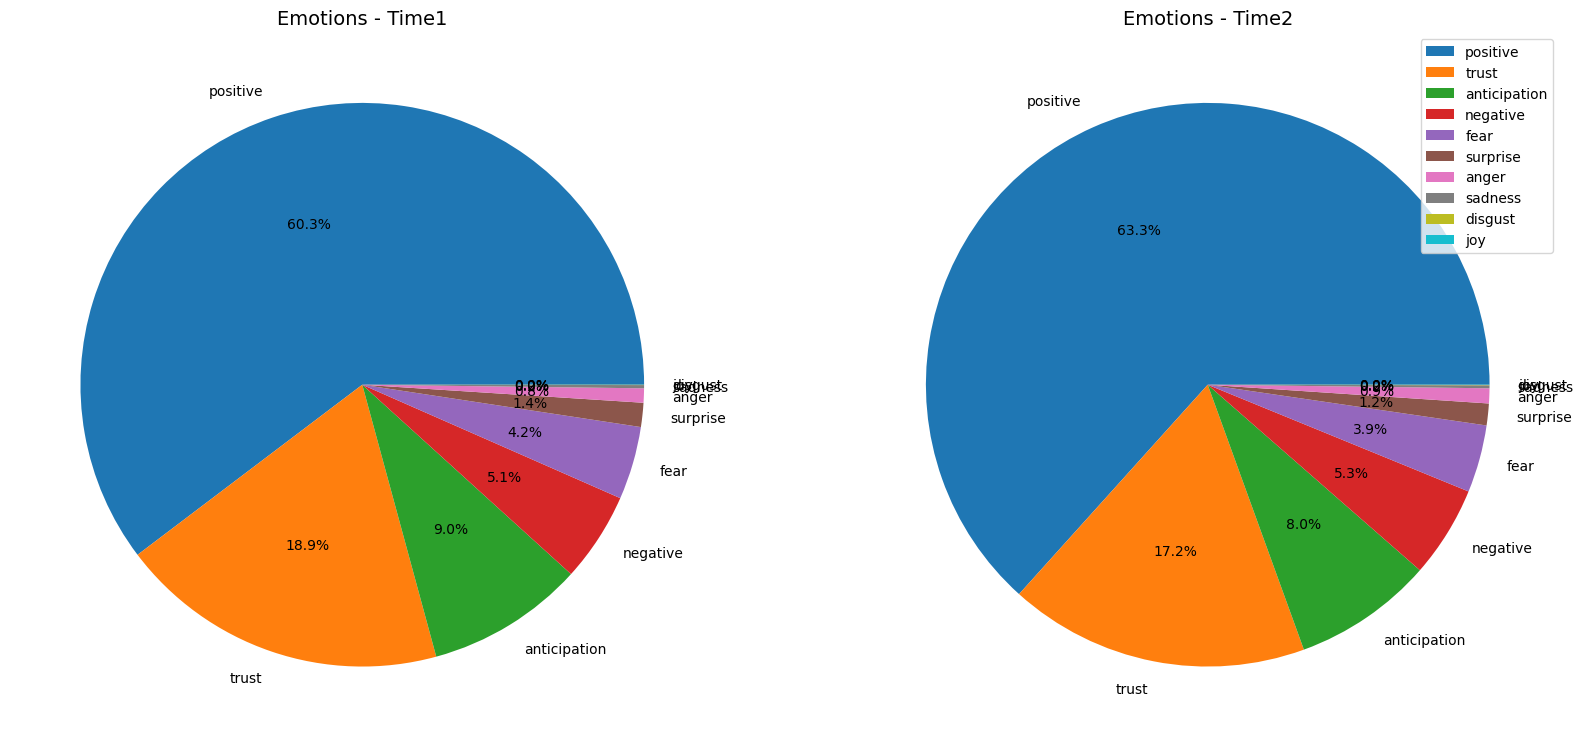

In [33]:
# A pie chart for showing the percentage of every emotion in the text
labels_time1 = emotion_chart_time1.index.tolist()
labels_time2 = emotion_chart_time2.index.tolist()

fig, axs=plt.subplots(1,2,figsize=(20,10))

axs[0].pie(emotion_chart_time1['count'].values, labels = labels_time1 , autopct = '%1.1f%%',labeldistance= 1.1)
axs[0].set_title('Emotions - Time1', fontsize=14)

axs[1].pie(emotion_chart_time2['count'].values, labels = labels_time2 , autopct = '%1.1f%%',labeldistance= 1.1)
axs[1].set_title('Emotions - Time2', fontsize=14)

plt.legend(loc = 'upper right')
plt.show()